In [2]:
import pandas as pd
from pathlib import Path
import re
import itertools
import enum
import matplotlib.pyplot as plt


In [3]:
class ModelType(str, enum.Enum):
    BADGES = 'Badges'
    COMMENTS = 'Comments'
    POST_HISTORY = 'PostHistory'
    POST_LINKS = 'PostLinks'
    POSTS = 'Posts'
    TAGS = 'Tags'
    USERS = 'Users'
    VOTES = 'Votes'


class ForumType(str, enum.Enum):
    BICYCLES = 'bicycles'
    CODEGOLF = 'codegolf'
    COFFEE = 'coffee'
    CRYPTO = 'crypto'
    GAMEDEV = 'gamedev'
    PETS = 'pets'
    UKRAINIAN = 'ukrainian'

    
def read_stackexchange_csv(name, forum_name, forum_sufix='stackexchange.com', base_path='data'):
    file_path = Path(base_path) / f'{forum_name}.{forum_sufix}' / f'{name}.csv'
    return pd.read_csv(file_path)


def read_stackexchange(model_type, forum_type):
    return read_stackexchange_csv(model_type.value, forum_type.value)


In [4]:
def get_tags(posts):
    tag_pattern = re.compile(r'<(?P<tag>[^<^>]+)>')
    for tags_str in posts.loc[posts.PostTypeId == 1, 'Tags']:
        tags = tag_pattern.findall(tags_str)
        tags = list(sorted(filter(None, tags)))
        if len(tags) > 1:
            for tag_pair in itertools.combinations(tags, 2):
                yield tag_pair

                
def get_tag_pairs(posts):
    return pd.DataFrame(get_tags(posts_df), columns=['Tag1', 'Tag2'])


def get_most_popular_tag_pairs(posts, tag=None):
    tag_pairs = get_tag_pairs(posts).groupby(['Tag1', 'Tag2'])\
                                    .size()\
                                    .reset_index()\
                                    .rename(columns={0: 'Count'})\
                                    .sort_values('Count', ascending=False)
    if tag:
        tag_pairs = tag_pairs.loc[(tag_pairs.Tag1 == tag) | (tag_pairs.Tag2 == tag), :]
    
    tag_pairs = tag_pairs.reset_index(drop=True)
    tag_pairs['Tag pair'] = tag_pairs['Tag1'] + ', ' + tag_pairs['Tag2']
    return tag_pairs


# Njapopularniejsze połączenia tagów

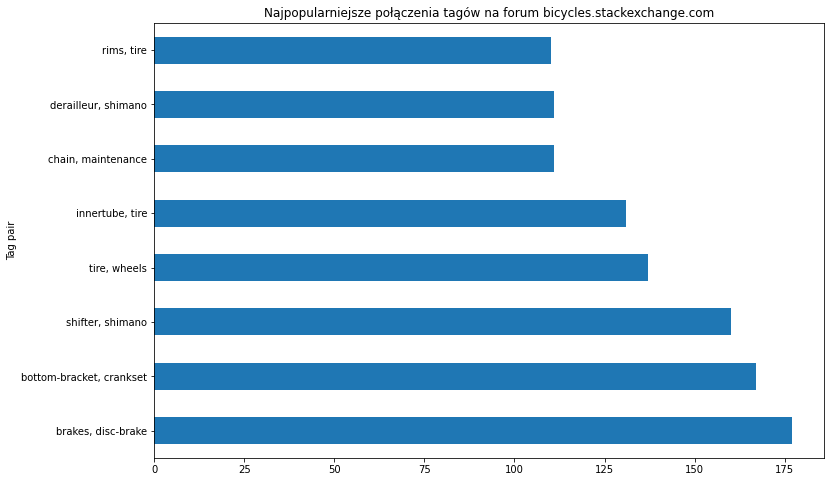

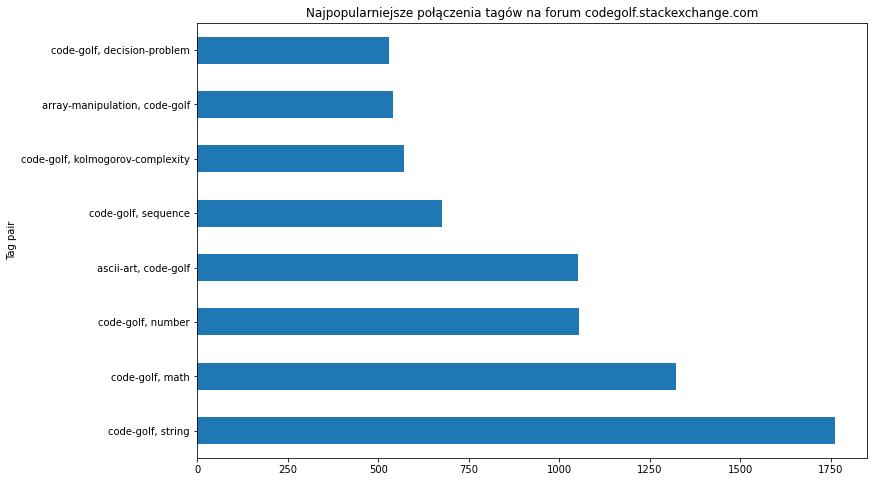

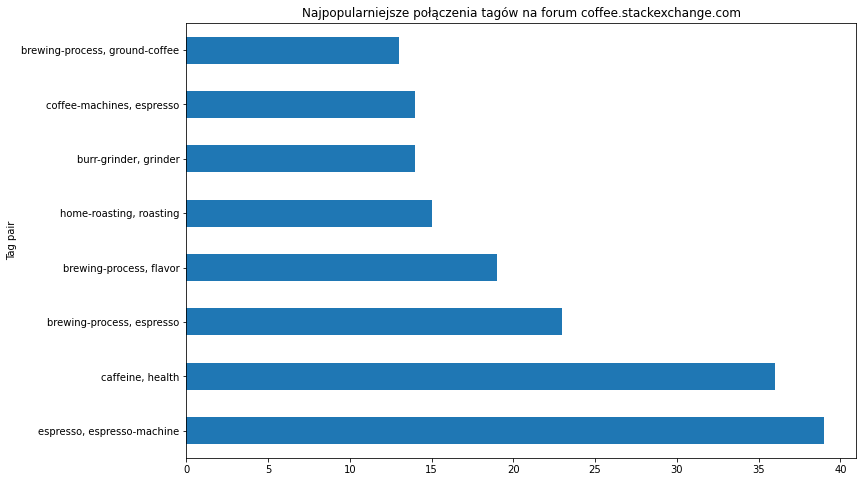

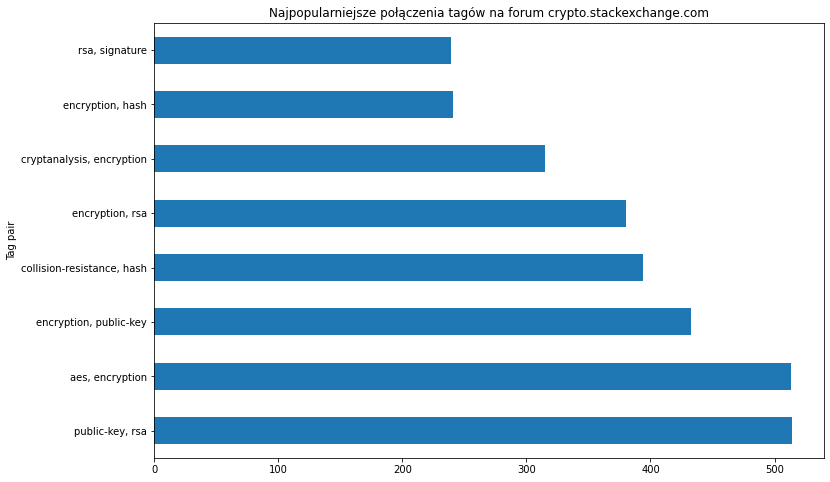

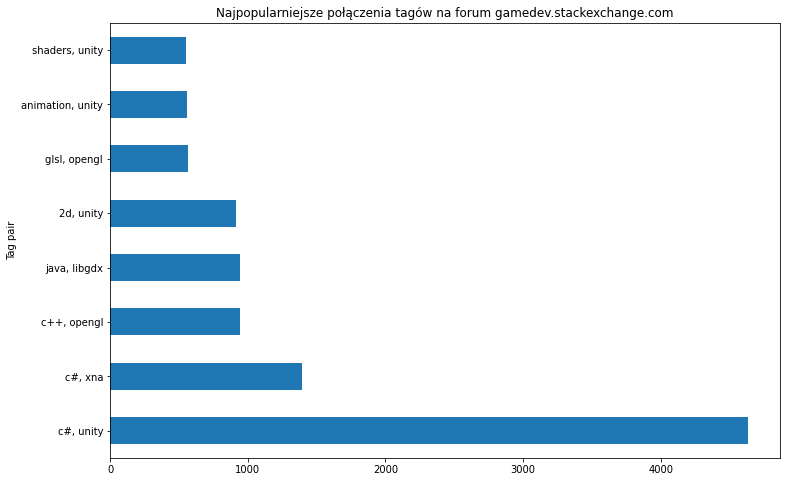

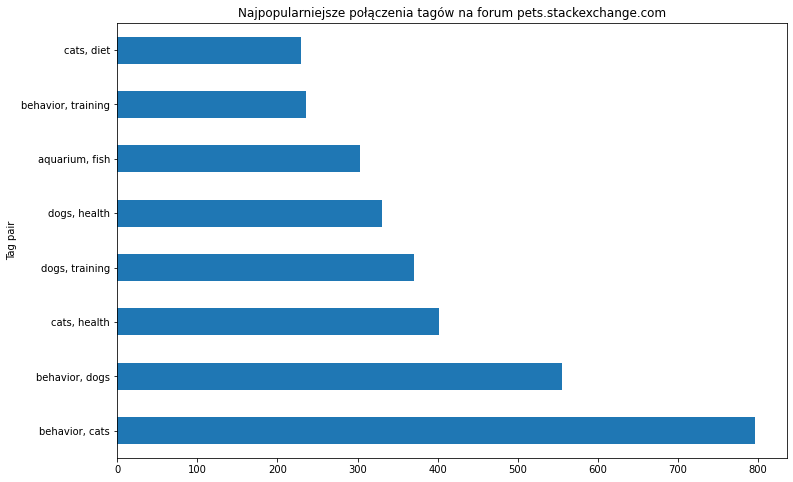

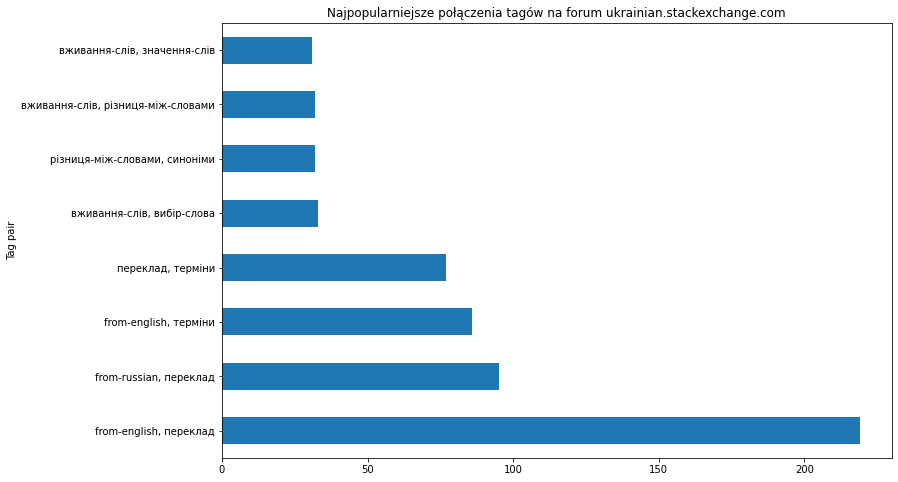

In [5]:
for forum_type in ForumType:
    posts_df = read_stackexchange(ModelType.POSTS, forum_type)
    most_popular_tag_pair_df = get_most_popular_tag_pairs(posts_df)
    title = f'Najpopularniejsze połączenia tagów na forum {forum_type.value}.stackexchange.com'
    plot = most_popular_tag_pair_df.head(8).plot.barh(x='Tag pair', y='Count', figsize=(12, 8), title=title,
                                                    ylabel='Count', legend = False)


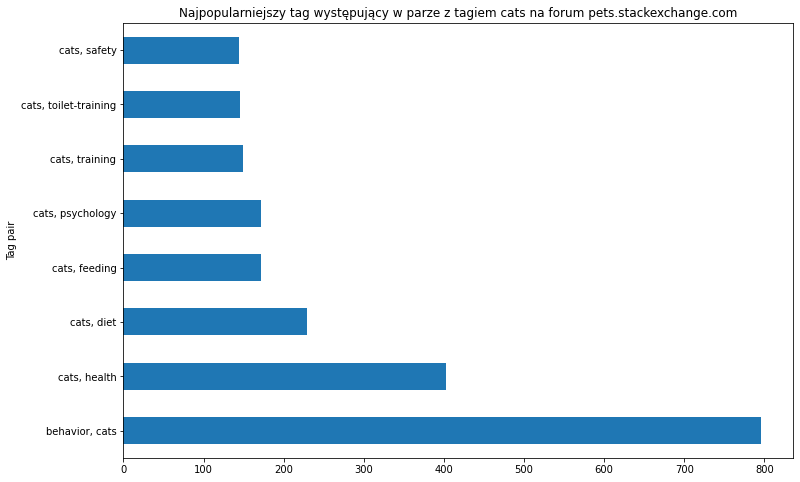

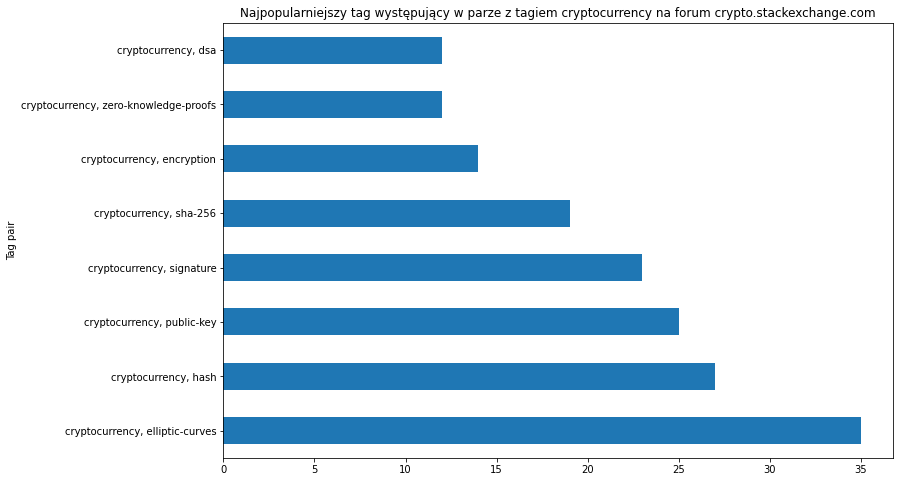

In [6]:
for forum_type, tag in [(ForumType.PETS, 'cats'), (ForumType.CRYPTO, 'cryptocurrency')] :
    posts_df = read_stackexchange(ModelType.POSTS, forum_type)
    most_popular_tag_pair_df = get_most_popular_tag_pairs(posts_df, tag)
    title = f'Najpopularniejszy tag występujący w parze z tagiem {tag} na forum {forum_type.value}.stackexchange.com'
    plot = most_popular_tag_pair_df.head(8).plot.barh(x='Tag pair', y='Count', figsize=(12, 8), title=title,
                                                      ylabel='Count', legend = False)
